In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import common

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.ensemble

In [2]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.20032527768207462
[[0.06366651 0.06035015 0.11846367 0.226207   0.53131266]
 [0.06044322 0.06071779 0.11735634 0.22463228 0.53685036]
 [0.06119861 0.05909856 0.11788014 0.22518078 0.5366419 ]
 [0.06142915 0.06023282 0.11745919 0.22538933 0.53548951]
 [0.06063029 0.05977759 0.11849041 0.22565709 0.53544462]]


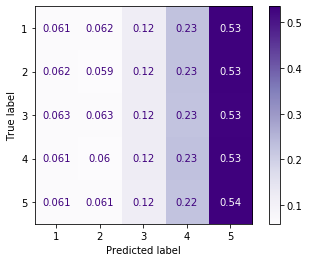

In [3]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

In [4]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, learning_rate='N/A', n_estimators='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,baseline,full,count,None,N/A,N/A,0.357756,0.19963


In [11]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('random_downsampling', 'count', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.39705397202428083

In [9]:
classifier.score(test_as_vec, test_targets)

0.533355483919617

In [ ]:
N_ESTIMATORS = 25

for sampling in ['random_downsampling', 'full', 'oversampled']:
    print(f'sampling = {sampling}')
    for representation in ['count', 'tf_idf']:
        print(f'    representation = {representation}')
        for learning_rate in [0.1, 0.5, 1]:
            print(f'        learning_rate = {learning_rate}')

            train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                sampling, representation, None)

            classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=N_ESTIMATORS, learning_rate=learning_rate)
            classifier.fit(train_as_vec, train_targets)

            results_df = results_df.append([
                    common.perf_row(
                        classifier, test_as_vec, test_targets,
                        'N/A', sampling, representation, 
                        None, n_estimators=N_ESTIMATORS, learning_rate=learning_rate)])

sampling = random_downsampling
    representation = count
        learning_rate = 0.1
        learning_rate = 0.5
        learning_rate = 1
    representation = tf_idf
        learning_rate = 0.1
        learning_rate = 0.5
        learning_rate = 1
sampling = full
    representation = count
        learning_rate = 0.1


In [6]:
results_df.sort_values('score', ascending=False)

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,N/A,oversampled,tf_idf,None,1,25,0.456451,0.379707
0,N/A,random_downsampling,tf_idf,None,1,25,0.456024,0.379319
0,N/A,oversampled,count,None,1,25,0.459462,0.378354
0,N/A,random_downsampling,count,None,1,25,0.465497,0.378036
0,N/A,oversampled,tf_idf,None,0.5,25,0.444084,0.374556
0,N/A,random_downsampling,tf_idf,None,0.5,25,0.450326,0.373669
0,N/A,oversampled,count,None,0.5,25,0.455944,0.373277
0,N/A,random_downsampling,count,None,0.5,25,0.463871,0.372087
0,N/A,random_downsampling,count,None,0.1,25,0.423215,0.323615
0,N/A,oversampled,tf_idf,None,0.1,25,0.410104,0.323531


In [7]:
results_df.sort_values('real_world_acc', ascending=False)

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,N/A,full,tf_idf,None,1,25,0.556984,0.297228
0,N/A,full,count,None,1,25,0.555614,0.293414
0,N/A,full,count,None,0.5,25,0.546363,0.239938
0,N/A,full,tf_idf,None,0.5,25,0.546142,0.241857
0,N/A,full,tf_idf,None,0.1,25,0.534352,0.203297
0,N/A,full,count,None,0.1,25,0.533966,0.202079
0,N/A,random_downsampling,count,None,1,25,0.465497,0.378036
0,N/A,random_downsampling,count,None,0.5,25,0.463871,0.372087
0,N/A,oversampled,count,None,1,25,0.459462,0.378354
0,N/A,oversampled,tf_idf,None,1,25,0.456451,0.379707


# Winner re-training

In [ ]:
N_ESTIMATORS = 1_000
sampling = 'oversampled'
representation = 'tf_idf'
preprocessing = None
learning_rate = 1

train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(sampling, representation, None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=N_ESTIMATORS, learning_rate=learning_rate)
classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [30]:
results_df = results_df.append([
    common.perf_row(
        best_ada, test_as_vec, test_targets,
        'N/A', sampling, representation, 
        None, n_estimators=N_ESTIMATORS, learning_rate=learning_rate)])

In [31]:
results_df

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score,order_aware_error_1,order_aware_error_2,order_aware_error_3,order_aware_error_4,order_aware_error_5,order_aware_error_avg
0,baseline,full,count,None,N/A,N/A,0.357756,0.199630,NaN,NaN,NaN,NaN,NaN,NaN
0,N/A,oversampled,tf_idf,None,1,1000,0.570877,0.510199,NaN,NaN,NaN,NaN,NaN,NaN
0,N/A,oversampled,tf_idf,None,1,1000,0.570877,0.510199,1.830312,1.277904,1.316928,1.227841,1.716943,1.473986


In [9]:
best_ada = classifier

SCORE: 0.5101993972055945
[[0.67025297 0.18822304 0.06324233 0.02429431 0.05398735]
 [0.28248676 0.39662679 0.20584428 0.06240439 0.05263777]
 [0.09196632 0.19556216 0.38450718 0.22486379 0.10310054]
 [0.04065455 0.05287796 0.19403497 0.41104997 0.30138255]
 [0.03976778 0.02205541 0.05987037 0.18974635 0.68856008]]


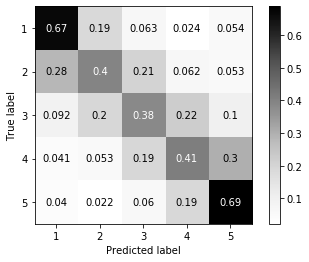

In [29]:
common.display_classifier_performance(best_ada, test_as_vec, test_targets)

## Word importance

In [19]:
np.argsort(best_ada.feature_importances_)[::-1][:100]

array([268723, 107436, 264611, 426698,  70812, 178019, 397765, 367713,
       657602,  45867, 470636, 660953, 599185, 656960, 427082, 679973,
       580427, 607883,  67897, 227899, 424122, 435118, 601759, 671538,
        95949, 333185, 616418, 217932, 673632, 249221, 665487, 402766,
       321351, 470679, 659459, 420625, 151758,  85058, 413549, 367834,
       476999, 132823, 289734, 181511, 208435, 181490, 532025, 323015,
        84529, 215776,  30511,  67772, 181456, 571696, 635681, 421830,
       673564, 445092, 666770, 187979, 322314, 208353,  95769, 209529,
        88441, 360438, 657416, 622569, 303984, 467551, 575126, 196157,
       126049, 141319, 512554, 649476, 573081,  42178, 466981, 446042,
       226930, 460764, 287631, 110827, 197494, 637139, 389133, 316092,
       637142, 261524, 188329, 551756, 170342, 404351, 363185, 277066,
       499079, 435703, 554345, 411132])

## Boosting score increase

In [24]:
from sklearn.metrics import balanced_accuracy_score

ada_scores = np.zeros((1_000,))
for idx, y_pred in enumerate(best_ada.staged_predict(test_as_vec)):
    ada_scores[idx] = balanced_accuracy_score(test_targets, y_pred)

ada_scores

array([0.22099112, 0.28306871, 0.29711779, 0.30026303, 0.31518395,
       0.32504792, 0.33134019, 0.33368791, 0.3363466 , 0.34114058,
       0.34463307, 0.34608783, 0.35243397, 0.35120324, 0.35412651,
       0.35659963, 0.35886721, 0.36690495, 0.36935311, 0.37069892,
       0.37273959, 0.37512772, 0.37670065, 0.37905941, 0.37970706,
       0.38175214, 0.38321833, 0.38435333, 0.3863881 , 0.388258  ,
       0.38920169, 0.39151647, 0.39281928, 0.39466662, 0.3955769 ,
       0.39612154, 0.39817516, 0.39990053, 0.39974025, 0.40237078,
       0.40300868, 0.40452868, 0.40647517, 0.40752821, 0.40936125,
       0.41018809, 0.41031967, 0.41076255, 0.41204526, 0.41264755,
       0.41524459, 0.41514564, 0.41670317, 0.41713395, 0.41818109,
       0.41917495, 0.41995377, 0.42150415, 0.4228146 , 0.4237988 ,
       0.42484751, 0.42567616, 0.42647222, 0.42763987, 0.42840811,
       0.43033551, 0.43046334, 0.43157547, 0.43247126, 0.43328341,
       0.43366454, 0.43490949, 0.43584643, 0.43579953, 0.43658

Text(0.5, 1.0, 'Balanced accuracy score <-> boosting levels')

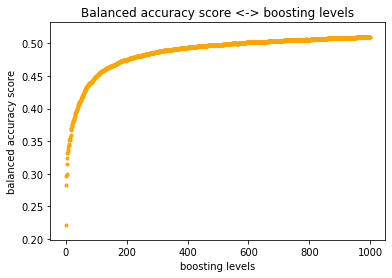

In [27]:
plt.scatter(np.arange(ada_scores.shape[0]), ada_scores, marker='.', color='orange')
plt.xlabel('boosting levels')
plt.ylabel('balanced accuracy score')
plt.title('Balanced accuracy score <-> boosting levels')

# Winners (boo!)

In [19]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('random_downsampling', 'tf_idf', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=10, learning_rate=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.42966717565886214

In [21]:
common.get_score(classifier, test_as_vec, test_targets)

0.33993329124163346

SCORE: 0.33993329124163346
[[0.39399198 0.13894031 0.1714484  0.05132655 0.24429277]
 [0.21666994 0.17321043 0.28601687 0.10892332 0.21517945]
 [0.10419019 0.13521545 0.35603764 0.16229817 0.24225854]
 [0.06028483 0.07970705 0.29876101 0.19969415 0.36155295]
 [0.04715493 0.04139366 0.18038429 0.15433487 0.57673225]]


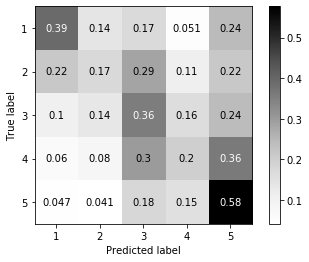

In [22]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)

In [23]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=10, learning_rate=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.5458257927082155

SCORE: 0.27254614272317623
[[0.22250501 0.01966682 0.05498997 0.07847447 0.62436372]
 [0.09809767 0.02565209 0.06130614 0.147323   0.6676211 ]
 [0.03627538 0.00980684 0.04570579 0.19021298 0.71799901]
 [0.01371103 0.00391149 0.02197093 0.1461192  0.81428735]
 [0.00693208 0.0018247  0.00867725 0.05981735 0.92274862]]


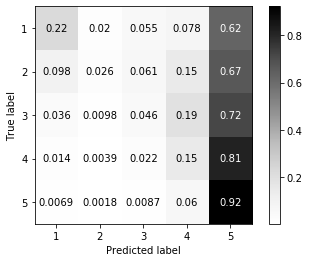

In [25]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)